In [1]:
#from climaf.api import *

import os, glob, sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

from scipy import signal

#clog('critical') 
import re

# To load personal libraries (currently in folder 'tools'):
sys.path.append('tools')

import generic_tools_pl as gt   # like hexcolor(), ...


* CHOIX DE LA REGION A TRAITER 


In [6]:
region="48"

In [3]:
all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
            'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 
            'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0',
            'NorESM2-LM']

# Data Preparation

In [4]:
# Chemin absolu du dossier "projetlong"
PROJETLONG_PATH = '/Users/dahmani/Desktop/GitPL'

# Chemin absolu du dossier "region48" ou "region50"
data_dir = "/Users/dahmani/Desktop/GitPL/data_source_dr/region{}".format(region)

* Visualiser Le dataset

In [6]:

# Open the .nc file using xarray
ds = xr.open_dataset('/Users/dahmani/Desktop/stagelong/projetlong/region48/MIROC6_hist-nat_Reg_region48.nc')
# Convert the dataset to a Pandas DataFrame
df = ds.to_dataframe().reset_index()
# Print the DataFrame
df

,time,tas_r10i1p1f1_ano,tas_r11i1p1f1_ano,tas_r12i1p1f1_ano,tas_r13i1p1f1_ano,tas_r14i1p1f1_ano,tas_r15i1p1f1_ano,tas_r16i1p1f1_ano,tas_r17i1p1f1_ano,tas_r18i1p1f1_ano,...,tas_r47i1p1f1_ano,tas_r48i1p1f1_ano,tas_r49i1p1f1_ano,tas_r4i1p1f1_ano,tas_r50i1p1f1_ano,tas_r5i1p1f1_ano,tas_r6i1p1f1_ano,tas_r7i1p1f1_ano,tas_r8i1p1f1_ano,tas_r9i1p1f1_ano
0,0,0.368683,0.347013,-0.381859,-0.016979,0.316080,0.195754,-0.045111,-0.777167,0.168835,...,-0.205883,-0.668628,0.941885,1.230066,0.174062,0.961370,-0.504811,-0.769272,-0.319038,-0.383213
1,1,1.304867,-0.836082,0.195356,0.465787,-0.141403,0.029440,-0.252002,-0.295546,0.547379,...,-0.064460,-0.464764,0.718581,0.382888,-0.059194,0.297159,-0.667909,-0.624045,0.019678,-0.439782
2,2,0.238862,-0.806265,0.352013,0.227786,0.397321,0.104761,0.279980,0.391918,0.877641,...,0.287275,0.711162,-0.184250,-0.975684,0.186425,-0.450815,0.470264,-0.199416,0.436923,-0.222431
3,3,-0.924709,-0.244760,0.383775,0.340703,1.045912,-0.182615,0.977905,0.586999,0.754862,...,0.799106,1.051387,-0.346319,-0.531524,0.817185,-0.412080,0.029243,0.492953,0.976466,-0.558563
4,4,-0.393633,0.300581,0.487239,0.914739,0.225922,-0.214296,0.836000,0.276362,-0.113454,...,1.171089,-0.143270,0.283111,-0.254881,-0.043023,0.342575,-0.178023,0.672822,0.190279,-0.296678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,-0.569996,0.032888,0.039580,-0.158320,0.021188,-0.067861,0.258904,0.038094,-0.349018,...,0.332389,-0.411191,-0.015798,-0.727550,0.479237,0.051922,0.624495,0.583758,-0.793167,0.256131
161,161,-0.523152,-0.485519,0.430829,-0.164201,0.021188,-0.385575,1.068652,0.271192,-0.348755,...,0.597886,0.247694,-0.645659,-0.694404,0.000405,0.051922,0.506378,0.945458,-0.558352,0.078821
162,162,0.183970,0.294595,0.813453,0.787596,0.021188,0.238129,0.543158,0.105701,-0.243460,...,0.797422,0.339915,-0.460697,-0.413065,-0.028878,0.051922,-0.589448,0.811571,-0.005689,0.159873
163,163,-0.164593,0.088366,1.245918,0.738894,0.021188,0.209293,-1.037925,0.126580,0.121011,...,0.072095,0.188136,0.460073,0.125519,-0.768458,0.051922,-0.210448,0.363654,0.082142,0.673703


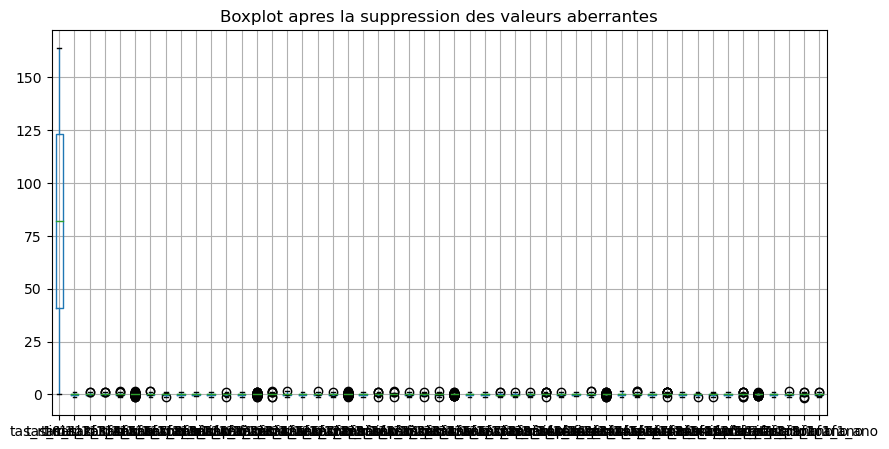

In [7]:
plt.figure(figsize=(10, 5))
plt.title("Boxplot apres la suppression des valeurs aberrantes")
df.boxplot()
plt.show()

In [8]:
# liste de modeles climatiques, triée par ordre alphabetique
data_dir_="/Users/dahmani/Desktop/stagelong/projetlong/region{}".format(region)
all_models = []
all_nc_files = np.sort(glob.glob(os.path.join(data_dir_,'*_hist-GHG_Reg_region{}.nc'.format(region))))

for f in np.sort(all_nc_files):
    basename = os.path.basename(f)
    #fname = basename.strip('_hist-GHG_Reg.nc')  # retire '_hist-GHG_Reg.nc' au nom de chaque fichier pour ne garder que le nom du modele climatique
    fname = basename.split('_')[0]  # prend le premier decoupage du nom du fichier, decoupant par '_', et qui correspond au nom du modele
    print(f,os.path.basename(f),fname)
    all_models.append(fname)

print(f"{len(all_models)} models found:\n {all_models}")

/Users/dahmani/Desktop/stagelong/projetlong/region50/ACCESS-ESM1-5_hist-GHG_Reg_region50.nc ACCESS-ESM1-5_hist-GHG_Reg_region50.nc ACCESS-ESM1-5
/Users/dahmani/Desktop/stagelong/projetlong/region50/BCC-CSM2-MR_hist-GHG_Reg_region50.nc BCC-CSM2-MR_hist-GHG_Reg_region50.nc BCC-CSM2-MR
/Users/dahmani/Desktop/stagelong/projetlong/region50/CESM2_hist-GHG_Reg_region50.nc CESM2_hist-GHG_Reg_region50.nc CESM2
/Users/dahmani/Desktop/stagelong/projetlong/region50/CNRM-CM6-1_hist-GHG_Reg_region50.nc CNRM-CM6-1_hist-GHG_Reg_region50.nc CNRM-CM6-1
/Users/dahmani/Desktop/stagelong/projetlong/region50/CanESM5_hist-GHG_Reg_region50.nc CanESM5_hist-GHG_Reg_region50.nc CanESM5
/Users/dahmani/Desktop/stagelong/projetlong/region50/FGOALS-g3_hist-GHG_Reg_region50.nc FGOALS-g3_hist-GHG_Reg_region50.nc FGOALS-g3
/Users/dahmani/Desktop/stagelong/projetlong/region50/GISS-E2-1-G_hist-GHG_Reg_region50.nc GISS-E2-1-G_hist-GHG_Reg_region50.nc GISS-E2-1-G
/Users/dahmani/Desktop/stagelong/projetlong/region50/HadGEM3

#### Filtrage des Regions et visualisation avec valeurs abberrentes 

In [7]:
# Chemin d'accès vers les fichiers de modèle climatique
chemin_dacces = "/Users/dahmani/Desktop/GitPL/Projet-long-2022-2023/*.nc"

nouveau_dossier = f"/Users/dahmani/Desktop/GitPL/region{region}"
if not os.path.exists(nouveau_dossier):
    os.mkdir(nouveau_dossier)

# Boucle pour parcourir tous les fichiers de modèle climatique
for fichier in glob.glob(chemin_dacces):
    # Charger le fichier de modèle climatique dans un objet Dataset
    ds = xr.open_dataset(fichier)

    # Extraire les données de la zone spécifiée
    zone_region = ds.sel(region=int(region))

# Écrire les données de la zone dans un nouveau fichier dans le nouveau dossier créé
    nouveau_fichier = os.path.join(nouveau_dossier, os.path.basename(fichier)[:-3] + f"_region{region}.nc")
    zone_region.to_netcdf(nouveau_fichier)


In [10]:
data_dir = '/Users/dahmani/Desktop/GitPL/region{}'.format(region)
# Exemple de lecture du forcage GHG ...
#  Lecture des profils d’anomalies de température de l'air, forcage GHG, pour tous les modeles
all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
                                             'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 
                                             'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0',
                                             'NorESM2-LM']
all_forcings = ['GHG', 'AER', 'NAT', 'HIST']
all_forc_file_ext = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

results_dict = {}

for model_name in all_models:
    model_dict = {}
    for forcing, forc_in_fname in zip(all_forcings, all_forc_file_ext):
        forcings_filename = f'{model_name}_{forc_in_fname}_Reg_region{region}.nc'
        
        profilsT_ds = xr.open_dataset(os.path.join(data_dir, forcings_filename))
        
        # comment savoir quelles variables de données dans le Dataset ?
        # c'est aussi la liste de membres du même forcage pour le modele en question
        list_nc_var = list(profilsT_ds.keys())

        model_dict[forcing] = len(list_nc_var)
        
        #del(profilsT_ds)
    results_dict[model_name] = model_dict

df = pd.DataFrame(results_dict)

All_sim=df.values
models=df.columns
forcings=df.index

# Chemin de sortie pour les fichiers
out_dir = '/Users/dahmani/Desktop/GitPL/Out-My-nb-1'

# Créer un répertoire pour la région si celui-ci n'existe pas encore
region_dir = os.path.join(out_dir, "region{}".format(region))
if not os.path.exists(region_dir):
    os.makedirs(region_dir)

# Enregistrer All_sim_z48v0 comme fichier .p dans le répertoire de la région
with open(os.path.join(region_dir, "All_sim_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(All_sim, f)

# Enregistrer models_z48v0 comme fichier .p dans le répertoire de la région
with open(os.path.join(region_dir, "models_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(models.tolist(), f)

# Enregistrer forcings_z48v0 comme fichier .p dans le répertoire de la région
with open(os.path.join(region_dir, "forcings_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(forcings.tolist(), f)

In [11]:
# Chemin d'accès vers les fichiers NetCDF
chemin_dacces = "/Users/dahmani/Desktop/GitPL/region{}/*.nc".format(region)

# Liste des types de forçage
types_forçage = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

# Liste des noms de modèles
noms_modeles = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']

# Boucle pour parcourir tous les types de forçage
for forçage in types_forçage:
    # Dictionnaire pour stocker les dataframes pour chaque modèle
    df_dict = {}

    # Boucle pour parcourir tous les fichiers NetCDF correspondant au type de forçage
    for fichier in glob.glob(f"/Users/dahmani/Desktop/GitPL/region{region}/*_{forçage}_*_*.nc"):
        # Extraire le nom du modèle à partir du nom de fichier
        modele = [nom_modele for nom_modele in noms_modeles if nom_modele in fichier][0]

        # Vérifier si le modèle existe déjà dans le dictionnaire
        if modele not in df_dict:
            # Si le modèle n'existe pas, créer un nouveau dataframe
            df_dict[modele] = pd.DataFrame()

        # Ouvrir le fichier NetCDF et extraire les données
        ds = xr.open_dataset(fichier)
        df = ds.to_dataframe().reset_index()
        # print(df.iloc[:, :5].columns.values.tolist())
        df = df.loc[:,(list(ds.keys()))]
        df = df.transpose().reset_index().rename(columns={'index': 'Variable'})
        # Ajouter les données au dataframe correspondant
        df['modele'] = modele
        df_dict[modele] = pd.concat([df_dict[modele], df])

    # Vérifier si au moins un modèle a été traité pour le type de forçage
    if df_dict:
        # Vérifier si chaque dataframe pour le modèle contient des données
        df_dict_filtered = {k: v for k, v in df_dict.items() if not v.empty}
#       Trier les dataframes de chaque modèle en fonction de l'ordre des modèles
        df_dict_sorted = {modele: df_dict_filtered[modele] for modele in noms_modeles if modele in df_dict_filtered}
        # Concaténer les dataframes de tous les modèles pour le type de forçage
        df_concat = pd.concat(df_dict_sorted.values())
        # Add the 'modele' column as the first column
        df_concat.insert(0, 'modele', df_concat.pop('modele'))    
        # Écrire le dataframe dans un fichier CSV
        fichier_sortie = f"/Users/dahmani/Desktop/GitPL/Out-My-nb-1/region{region}/{forçage}_{region}.csv"
        df_concat.to_csv(fichier_sortie, index=False)

        print(f"Données pour le type de forçage {forçage}: {df_concat.shape}")
    else:
        # Afficher un message d'avertissement si aucun modèle n'a été trouvé pour le type de forçage
        print(f"Aucun modèle trouvé pour le type de forçage {forçage}")

Données pour le type de forçage hist-GHG: (103, 167)
Données pour le type de forçage hist-aer: (89, 167)
Données pour le type de forçage hist-nat: (160, 167)
Données pour le type de forçage historical: (256, 167)


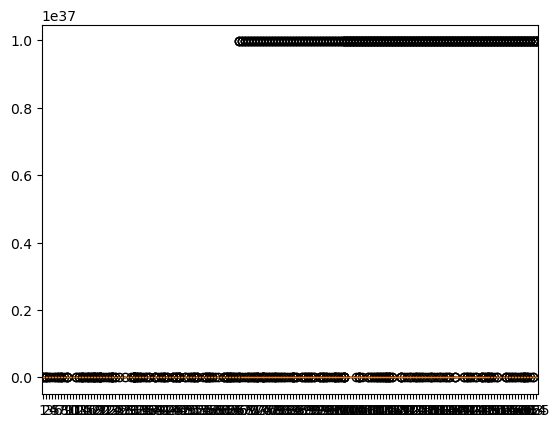

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('/Users/dahmani/Desktop/GitPL/Out-My-nb-1/region48/hist-nat_48.csv')

# Supprimer les deux premières colonnes
df = df.iloc[:, 2:]

# Créer un box plot des données restantes
plt.boxplot(df.values)
plt.show()

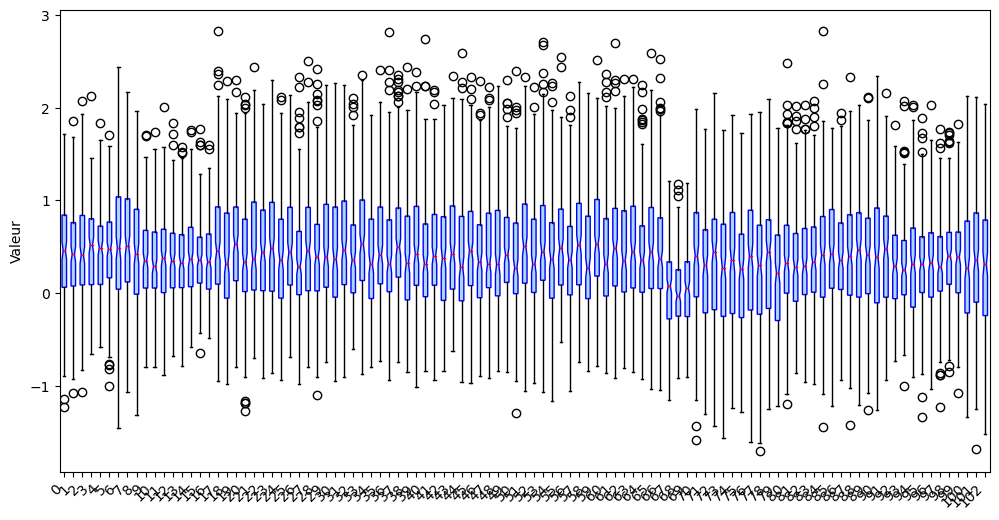

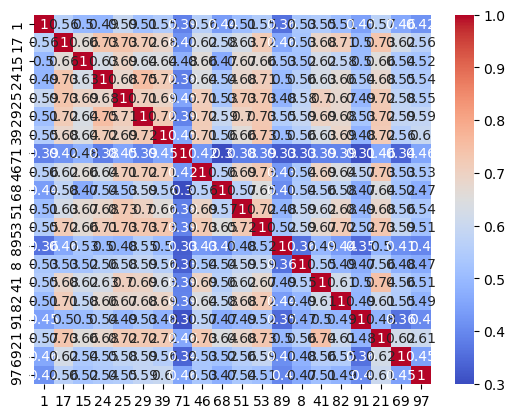

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('/Users/dahmani/Desktop/GitPL/Out-My-nb-1/region48/hist-GHG_48.csv')

# Supprimer les deux premières colonnes
df = df.iloc[:, 2:]
df = df.T
# Créer un box plot pour chaque colonne
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(df.values, patch_artist=True, notch=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='red'))

# Personnaliser les labels et l'axe des ordonnées
ax.set_xticklabels(df.columns, rotation=45, ha='right')
ax.set_ylabel('Valeur')

# Ajouter une légende pour le box plot
box_colors = ['lightblue']*len(df.columns)
box_colors[0] = 'blue'
handles = [plt.Rectangle((0,0),1,1, color=box_colors[i]) for i in range(len(df.columns))]
labels = df.columns
# ax.legend(handles, labels, loc='upper right')

plt.show()

# Sélectionner un échantillon aléatoire de 20 variables
selected_cols = np.random.choice(df.columns, size=20, replace=False)

# Créer une matrice de corrélation pour les variables sélectionnées
corr_matrix = df[selected_cols].corr()

# Afficher la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


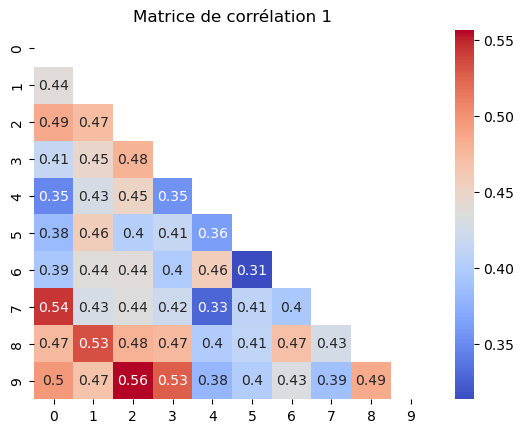

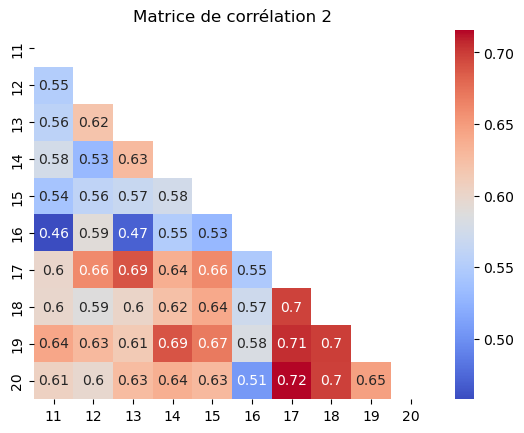

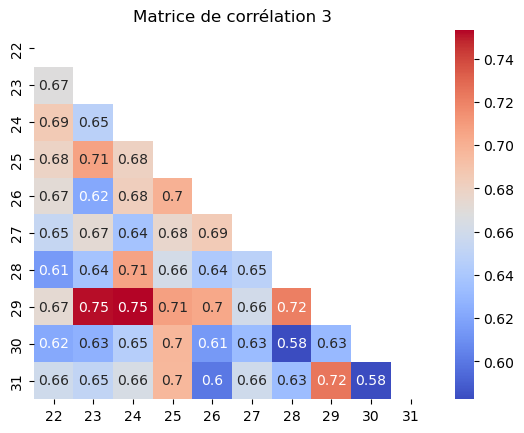

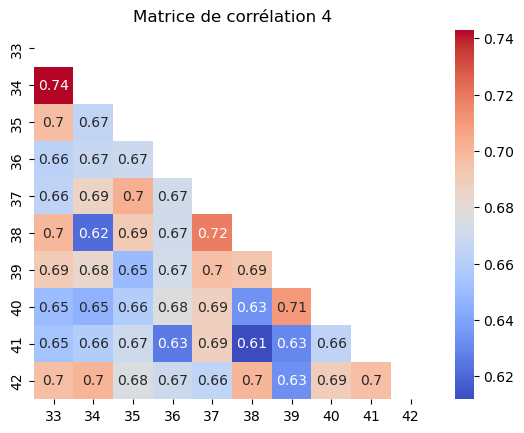

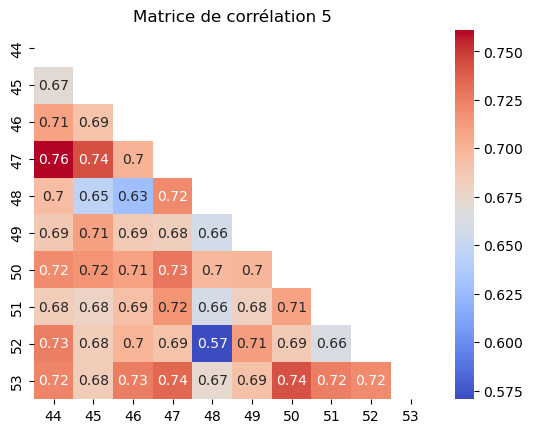

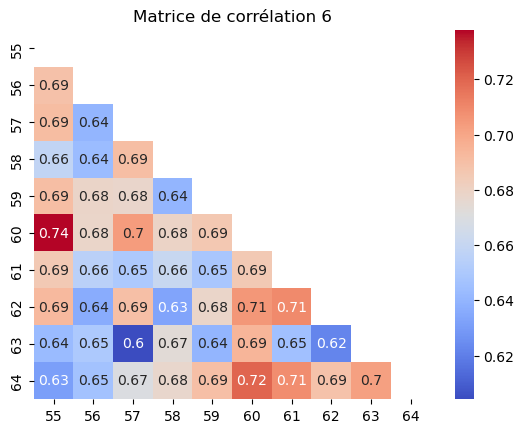

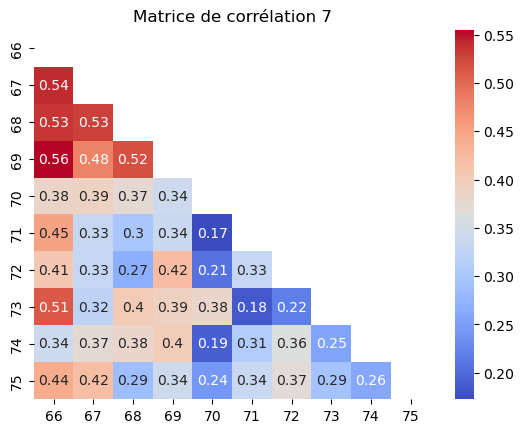

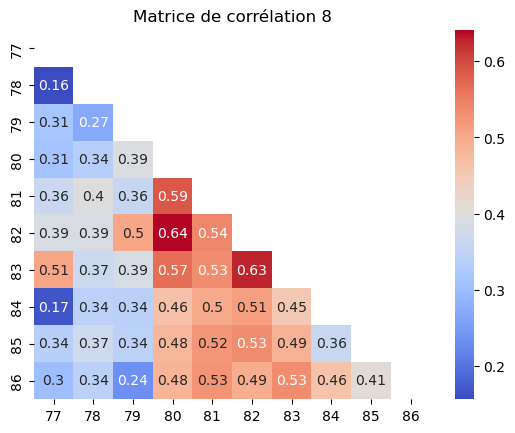

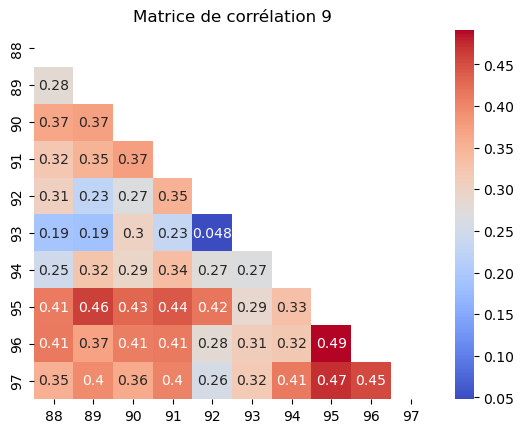

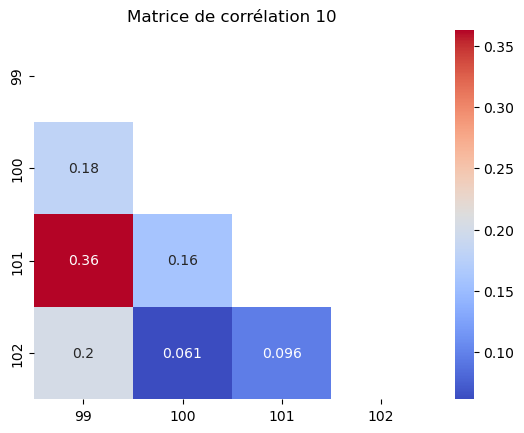

In [29]:
# Charger le fichier CSV
df = pd.read_csv('/Users/dahmani/Desktop/GitPL/Out-My-nb-1/region48/hist-GHG_48.csv')

# Supprimer les deux premières colonnes
df = df.iloc[:, 2:]
df=  df.T
# Diviser les colonnes en sous-ensembles de 20 variables
n_cols = len(df.columns)
subsets = [df.iloc[:, i:i+10] for i in range(0, n_cols, 11)]

# Créer une matrice de corrélation pour chaque sous-ensemble
for i, subset in enumerate(subsets):
    corr_matrix = subset.corr()

    # Masquer les valeurs de corrélation faibles
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True

    # Afficher la matrice de corrélation
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)
    plt.title(f'Matrice de corrélation {i+1}')
    plt.show()


## Constuire un data set avec les models et les forcages avec le nombre de profils pour chaque cas

* Supprimer les valeurs aberrantes

In [33]:

# chemin du dossier contenant les fichiers .nc
data_dir = '/Users/dahmani/Desktop/stagelong/projetlong/region{}'.format(region)

# parcours de tous les fichiers .nc dans le dossier
for file_name in os.listdir(data_dir):
    if file_name.endswith('.nc'):
        # ouverture du fichier netcdf avec xarray
        ds = xr.open_dataset(os.path.join(data_dir, file_name))

        # suppression des colonnes contenant des valeurs supérieures à 10
        ds = ds.where((ds <= 10)).drop_vars(ds.coords)

        # remplacement des valeurs NaN par la moyenne des données
        ds = ds.fillna(np.mean(ds))

        # enregistrement du fichier modifié
        ds.to_netcdf(os.path.join(data_dir, file_name))



* Génerer les 3 fichiers, All_sim, models, Forcings

In [34]:


data_dir = '/Users/dahmani/Desktop/stagelong/projetlong/region{}'.format(region)
# Exemple de lecture du forcage GHG ...
#  Lecture des profils d’anomalies de température de l'air, forcage GHG, pour tous les modeles
all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
                                             'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 
                                             'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0',
                                             'NorESM2-LM']
all_forcings = ['GHG', 'AER', 'NAT', 'HIST']
all_forc_file_ext = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

results_dict = {}

for model_name in all_models:
    model_dict = {}
    for forcing, forc_in_fname in zip(all_forcings, all_forc_file_ext):
        forcings_filename = f'{model_name}_{forc_in_fname}_Reg_region{region}.nc'
        
        profilsT_ds = xr.open_dataset(os.path.join(data_dir, forcings_filename))
        
        # comment savoir quelles variables de données dans le Dataset ?
        # c'est aussi la liste de membres du même forcage pour le modele en question
        list_nc_var = list(profilsT_ds.keys())

        model_dict[forcing] = len(list_nc_var)
        
        #del(profilsT_ds)
    results_dict[model_name] = model_dict

df = pd.DataFrame(results_dict)

All_sim=df.values
models=df.columns
forcings=df.index

# Chemin de sortie pour les fichiers
out_dir = '/Users/dahmani/Desktop/stagelong/projetlong/data_source_dr/Region{}'.format(region)

# Enregistrer All_sim_z48v0 comme fichier .p
with open(os.path.join(out_dir, "All_sim_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(All_sim, f)

# Enregistrer models_z48v0 comme fichier .p
with open(os.path.join(out_dir, "models_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(models.tolist(), f)

# Enregistrer forcings_z48v0 comme fichier .p
with open(os.path.join(out_dir, "forcings_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(forcings.tolist(), f)

#### Générer les 4 fichiers pour chaque forcage 

In [36]:

# Chemin d'accès vers les fichiers NetCDF
chemin_dacces = "/Users/dahmani/Desktop/stagelong/projetlong/region{}/*.nc".format(region)

# Liste des types de forçage
types_forçage = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

# Liste des noms de modèles
noms_modeles = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']

# Boucle pour parcourir tous les types de forçage
for forçage in types_forçage:
    # Dictionnaire pour stocker les dataframes pour chaque modèle
    df_dict = {}

    # Boucle pour parcourir tous les fichiers NetCDF correspondant au type de forçage
    for fichier in glob.glob(f"/Users/dahmani/Desktop/stagelong/projetlong/region{region}/*_{forçage}_*_*.nc"):
        # Extraire le nom du modèle à partir du nom de fichier
        modele = [nom_modele for nom_modele in noms_modeles if nom_modele in fichier][0]

        # Vérifier si le modèle existe déjà dans le dictionnaire
        if modele not in df_dict:
            # Si le modèle n'existe pas, créer un nouveau dataframe
            df_dict[modele] = pd.DataFrame()

        # Ouvrir le fichier NetCDF et extraire les données
        ds = xr.open_dataset(fichier)
        df = ds.to_dataframe().reset_index()
        # print(df.iloc[:, :5].columns.values.tolist())
        df = df.loc[:,(list(ds.keys()))]
        df = df.transpose().reset_index().rename(columns={'index': 'Variable'})
        # Ajouter les données au dataframe correspondant
        df['modele'] = modele
        df_dict[modele] = pd.concat([df_dict[modele], df])

    # Vérifier si au moins un modèle a été traité pour le type de forçage
    if df_dict:
        # Vérifier si chaque dataframe pour le modèle contient des données
        df_dict_filtered = {k: v for k, v in df_dict.items() if not v.empty}
#       Trier les dataframes de chaque modèle en fonction de l'ordre des modèles
        df_dict_sorted = {modele: df_dict_filtered[modele] for modele in noms_modeles if modele in df_dict_filtered}
        # Concaténer les dataframes de tous les modèles pour le type de forçage
        df_concat = pd.concat(df_dict_sorted.values())
        # Add the 'modele' column as the first column
        df_concat.insert(0, 'modele', df_concat.pop('modele'))    
        # Écrire le dataframe dans un fichier CSV
        fichier_sortie = f"{forçage}_{region}.csv"
        df_concat.to_csv(fichier_sortie, index=False)

        print(f"Données pour le type de forçage {forçage}: {df_concat.shape}")
    else:
        # Afficher un message d'avertissement si aucun modèle n'a été trouvé pour le type de forçage
        print(f"Aucun modèle trouvé pour le type de forçage {forçage}")

Données pour le type de forçage hist-GHG: (103, 167)
Données pour le type de forçage hist-aer: (89, 167)
Données pour le type de forçage hist-nat: (160, 167)
Données pour le type de forçage historical: (256, 167)


In [37]:


# lire les fichiers csv en tant que dataframe
hist_GHG = pd.read_csv('hist-GHG_{}.csv'.format(region))
hist_aer = pd.read_csv('hist-aer_{}.csv'.format(region))
hist_nat = pd.read_csv('hist-nat_{}.csv'.format(region))
historical = pd.read_csv('historical_{}.csv'.format(region))

# supprimer les deux premières colonnes de chaque dataframe
hist_GHG = hist_GHG.iloc[:, 2:]
hist_aer = hist_aer.iloc[:, 2:]
hist_nat = hist_nat.iloc[:, 2:]
historical = historical.iloc[:, 2:]


# convertir chaque dataframe en tableau numpy (array)
hist_GHG = np.array(hist_GHG)
hist_aer = np.array(hist_aer)
hist_nat = np.array(hist_nat)
historical = np.array(historical)

#Lissage 
filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)

hist_GHG = signal.filtfilt(b_lp_filter, a_lp_filter, hist_GHG)
hist_aer = signal.filtfilt(b_lp_filter, a_lp_filter, hist_aer)
hist_nat = signal.filtfilt(b_lp_filter, a_lp_filter, hist_nat)
historical = signal.filtfilt(b_lp_filter, a_lp_filter, historical)


# plt.plot(hist_GHG[:,:].T)
# Afficher le nombre de lignes et de colonnes du dataframe

# Définir le chemin où sauvegarder les fichiers .p
output_path = "/Users/dahmani/Desktop/stagelong/projetlong/data_source_dr/Region{}".format(region)

# Sauvegarder chaque tableau numpy en tant que fichier .p
with open(os.path.join(output_path, 'T_ghg_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(hist_GHG, f)
with open(os.path.join(output_path, 'T_aer_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(hist_aer, f)
with open(os.path.join(output_path, 'T_nat_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(hist_nat, f)
with open(os.path.join(output_path, 'T_hist_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(historical, f)



* Tester les données si cava

In [24]:
test1=pd.read_csv("/Users/dahmani/Desktop/stagelong/projetlong/Code-PL/hist-nat_48.csv")


In [26]:
df=test1[test1.modele.str.contains("MIROC6")]
df


,modele,Variable,0,1,2,3,4,5,6,7,...,155,156,157,158,159,160,161,162,163,164
102,MIROC6,tas_r10i1p1f1_ano,0.368683,1.304867,0.238862,-0.924709,-0.393633,-0.184284,-0.132564,0.153411,...,-0.084256,0.285887,0.378407,1.192191,0.562248,-0.569996,-0.523152,0.183970,-0.164593,0.259715
103,MIROC6,tas_r11i1p1f1_ano,0.347013,-0.836082,-0.806265,-0.244760,0.300581,1.022799,-0.135230,-0.677223,...,-0.670174,-0.148444,-0.186377,0.672529,0.938320,0.032888,-0.485519,0.294595,0.088366,-0.336370
104,MIROC6,tas_r12i1p1f1_ano,-0.381859,0.195356,0.352013,0.383775,0.487239,0.036310,0.117364,0.291474,...,-0.419687,-0.151447,0.229566,0.388504,0.466755,0.039580,0.430829,0.813453,1.245918,0.034868
105,MIROC6,tas_r13i1p1f1_ano,-0.016979,0.465787,0.227786,0.340703,0.914739,0.010237,-0.624608,0.107137,...,0.949866,1.442584,0.063174,-0.710486,-0.402600,-0.158320,-0.164201,0.787596,0.738894,0.242768
106,MIROC6,tas_r14i1p1f1_ano,0.316080,-0.141403,0.397321,1.045912,0.225922,-0.933141,-0.796490,-0.574673,...,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188
107,MIROC6,tas_r15i1p1f1_ano,0.195754,0.029440,0.104761,-0.182615,-0.214296,0.285427,-0.224809,-0.228358,...,0.405320,-0.080888,0.232196,0.792577,0.938442,-0.067861,-0.385575,0.238129,0.209293,-0.188628
108,MIROC6,tas_r16i1p1f1_ano,-0.045111,-0.252002,0.279980,0.977905,0.836000,-0.805704,-0.690860,-0.114357,...,0.146857,0.831413,0.734633,-0.558280,-0.539769,0.258904,1.068652,0.543158,-1.037925,-0.758086
109,MIROC6,tas_r17i1p1f1_ano,-0.777167,-0.295546,0.391918,0.586999,0.276362,-0.056060,-0.345237,-0.246967,...,0.198065,-0.572298,-0.528025,-0.280616,-0.150345,0.038094,0.271192,0.105701,0.126580,0.355174
110,MIROC6,tas_r18i1p1f1_ano,0.168835,0.547379,0.877641,0.754862,-0.113454,-0.852452,-0.479595,0.054365,...,0.156715,-0.151723,-0.322250,0.673657,0.318171,-0.349018,-0.348755,-0.243460,0.121011,0.395491
111,MIROC6,tas_r19i1p1f1_ano,-0.155130,-0.116652,-0.018237,0.230722,0.067869,-0.208996,-0.217130,0.156049,...,0.350681,-0.185420,0.141115,0.082632,0.441820,0.505698,-0.138765,-0.003691,0.405042,0.904933


In [27]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.039921,0.023398,0.064163,0.177997,0.151292,0.059702,0.001302,-0.032725,0.016330,0.115256,...,0.028497,0.025978,0.041705,0.110573,0.170582,0.124806,0.078406,0.121572,0.031993,0.122814
std,0.531875,0.417907,0.456114,0.558525,0.408873,0.558565,0.464938,0.433166,0.488563,0.393025,...,0.461443,0.431878,0.396893,0.417807,0.458916,0.480606,0.514293,0.397738,0.475753,0.448989
min,-0.830418,-0.836082,-0.990916,-0.924709,-0.463983,-1.093693,-0.796490,-0.911280,-1.207842,-0.634310,...,-1.141505,-0.734551,-0.786216,-0.710486,-0.818832,-1.082522,-0.744187,-0.641459,-1.037925,-0.758086
25%,-0.338854,-0.194885,-0.197287,-0.206536,-0.161727,-0.293237,-0.295217,-0.286198,-0.238517,-0.152265,...,-0.275260,-0.261965,-0.222398,-0.136639,-0.102817,-0.147969,-0.282876,-0.142782,-0.203858,-0.150342
50%,-0.035064,-0.020381,0.118726,0.172790,0.143321,0.037362,-0.049906,-0.064573,0.100341,0.164045,...,0.042549,0.009851,0.068073,0.047538,0.050841,0.071368,0.044325,0.104553,0.082026,0.071210
75%,0.292806,0.277985,0.364085,0.523931,0.305953,0.394056,0.292064,0.285019,0.334306,0.314528,...,0.211785,0.182775,0.250893,0.368916,0.543019,0.378514,0.344215,0.318769,0.321726,0.359853
max,1.337983,1.304867,0.926109,1.149875,1.171089,1.407290,1.176630,1.128566,0.966285,0.974205,...,1.282111,1.442584,1.070122,1.192191,1.083077,1.406937,1.397294,1.017237,1.245918,0.985962


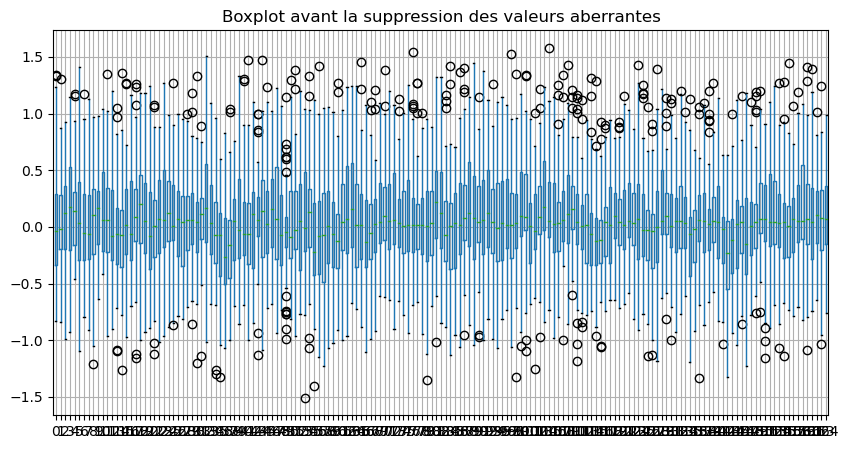

In [28]:
# Visualiser le boxplot avant la suppression des valeurs aberrantes
plt.figure(figsize=(10, 5))
plt.title("Boxplot Aprés la suppression des valeurs aberrantes")
df.boxplot()
plt.show()


In [22]:
df=df.drop(columns=["modele","Variable"]).values

In [ ]:
# # Visualiser le boxplot avant la suppression des valeurs aberrantes
# plt.figure(figsize=(10, 5))
# plt.title("Boxplot avant la suppression des valeurs aberrantes")
# df.boxplot()
# plt.show()

# # Identifier les valeurs aberrantes avec l'écart interquartile (IQR)
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# aberrant = ((df < (Q1 - 1.8 * IQR)) | (df > (Q3 + 1.8 * IQR))).any(axis=1)

# # Supprimer les lignes contenant des valeurs aberrantes
# df_clean = df[~aberrant]
# # Afficher le nombre de lignes supprimées
# print("Nombre de lignes supprimées : ", len(df) - len(df_clean))

# # Visualiser le boxplot après la suppression des valeurs aberrantes
# plt.figure(figsize=(10, 5))
# plt.title("Boxplot après la suppression des valeurs aberrantes")
# df_clean.boxplot()
# plt.show()

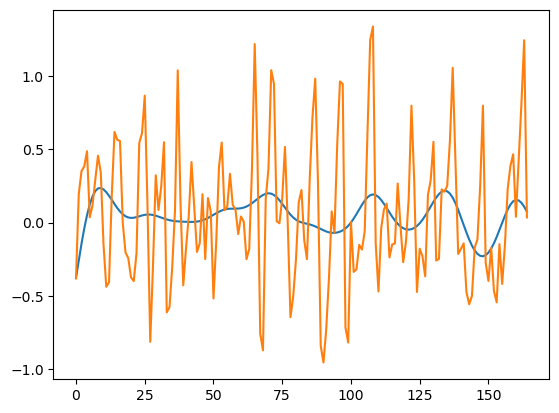

In [51]:
filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)
tmp_filtered_arr = signal.filtfilt(b_lp_filter, a_lp_filter, df_clean_np)
plt.plot(tmp_filtered_arr[1,:].T)
plt.plot(df_clean_np[1,:].T)